In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [2]:
diabetes_data = pd.read_csv('datasets\\diabetes.csv')
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)

In [3]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
diabetes_data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Logistic Regression으로 학습 및 예측 수행**

In [5]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression(solver = 'liblinear')
y_pred = cross_val_predict(lr_clf, X_train, y_train, cv=3)

print(classification_report(y_train,y_pred ))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       400
           1       0.72      0.52      0.60       214

    accuracy                           0.76       614
   macro avg       0.75      0.70      0.72       614
weighted avg       0.75      0.76      0.75       614



* 오차행렬

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_pred)

array([[356,  44],
       [103, 111]], dtype=int64)

array([[356,  44],
       [103, 111]], dtype=int64)

* 정확도

In [17]:
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.760586319218241

* 정밀도

In [9]:
precision_score(y_train, y_pred)

0.7161290322580646

0.7161290322580646

* 재현율

In [18]:
recall = recall_score(y_train, y_pred)
recall

0.5186915887850467

0.5186915887850467

* f1 score

In [11]:
f1_score(y_train, y_pred)

0.6016260162601627

0.6016260162601627

**precision recall 곡선 그림**

In [12]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              

* precision_recall_curve 로 정밀도, 재현율, 임계값 구하기

In [15]:

y_scores = cross_val_predict(lr_clf, X_train, y_train, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

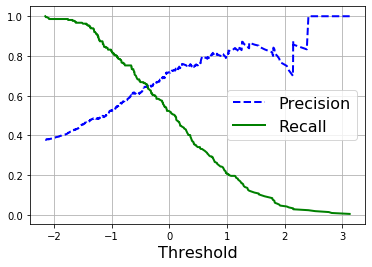

In [16]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

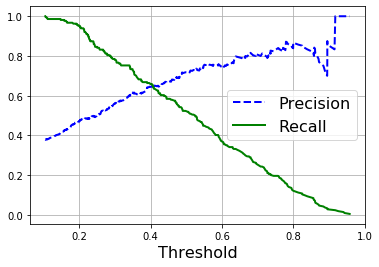

In [13]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

**분류결정 임곗값을 변경하면서 성능 측정**

* 정밀도 74% 이상 목표

In [15]:
threshold_74_precision = ####
threshold_74_precision

0.5407050943962691

In [16]:
y_train_pred_74 = ####

* 정밀도 확인

In [17]:
precision_score(####, ####)

0.7407407407407407

* 재현율 확인

In [18]:
recall_score(####, ####)

0.4672897196261682